<br>
<h1> The Efficient Frontier </h1>
<hr>
<h3> Portfolio Risk and Return </h3>
<br>
Assume that we have two assets in our portfolio
Let's also say that we have a certain weight ($w_{a}$) for the risky asset $A$, and weight ($w_{b}$) for the risk-free asset $B$. The sum of weights should be equal to one, so that: $ w_{a} + w_{b} = 1.00 $
<br>
<br>
<b> Returns </b>
<br>
Thus, the expected return for the portfolio ($p$) should be equal to:
<br>
<br>
\begin{align}
\mathbb{E}(p) & = w_{a}\mathbb{E}(A) + w_{b}\mathbb{E}(B)\\
\mathbb{E}(p) & = w_{a}\mathbb{E}(A) + (1 - w_{a})\mathbb{E}(B)\\
\end{align}
<br>
We could then infer that our expected return for the portfolio is equal to the sum of an Asset's weight times their respective expected returns:
<br>
<br>
\begin{align}
\mathbb{E}(p) & = \sum_{i=1}^{k}w_{i}\mathbb{E}(r_{i})
\end{align}
<br>
<br>
<b> Volatility </b>
<br>
Similarly to returns, volatility is also additive. Thus:
<br>
<br>
\begin{align}
Var(X) & = \sigma^{2}(X)\equiv \sigma_{X}^{2} \equiv \mathbb{E}[(X-\mathbb{E}[X])^2] \\
\therefore Var(X) & = \mathbb{E}[(X-\mathbb{E}[X])^2] = \mathbb{E}[X^{2}] - \mathbb{E}[X]^2\\ \\
& \text{Remember that }Var(X) = Cov(X,X).\text{ Substituting } X \text{ for} A + B:  \\ \\
Var(A + B) & = Cov(A+B, A+B) \\
& = \mathbb{E}[(A - \mathbb{E}[A])(B - \mathbb{E}[B])] \\
& = \mathbb{E}[(A+B)^{2}] - \mathbb{E}[A + B]\mathbb{E}[A+B] \\
& = \mathbb{E}[A^{2}] - \mathbb{E}[A]^{2} + \mathbb{E}[B^{2}] - \mathbb{E}[B]^{2} + 2(\mathbb{E}[AB] - \mathbb{E}[A]\mathbb{E}[B])\\ \\
\therefore Var(A + B) & = Var(A) + Var(B) + 2Cov(A, B)
\end{align}
<br>
<br>
Thus, the volatility should be:
<br>
\begin{align}
\sigma_{p} & = \sqrt{Var(A) + Var(B) + 2Cov(A, B)}\\
\sigma_{p} & = \sqrt{w_{a}^{2}\sigma_{a}^{2} + w_{b}^{2}\sigma_{b}^{2} + 2w_{a}w_{b}\rho_{ab}\sigma_{a}\sigma_{b}}
\end{align}
<br>
<br>
We could also consider the following matrices:
<br>
<br>
\begin{align}
w & = 
\begin{bmatrix}
w_{a} & w_{b}
\end{bmatrix}\\
Cov(a, b) & = 
\begin{bmatrix}
\sigma_{a}^{2} & \sigma_{ab}\\
\sigma_{ba} & \sigma_{b}^{2}
\end{bmatrix}
\end{align}
<br>
Multiplying the transposed weight matrix ($w'$) and the covariance ($Cov(a,b)$) matrix, we have:
<br>
<br>
\begin{align}
\begin{bmatrix}
\sigma_{a}^{2} & \sigma_{ab}\\
\sigma_{ba} & \sigma_{b}^{2}
\end{bmatrix}
\begin{bmatrix}
w_{a}\\
w_{b}
\end{bmatrix}
= \begin{bmatrix}
\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}\\
\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b}
\end{bmatrix}
\end{align}
<br>
Let's now multiply the weight ($w$) matrix by our previous results:
<br>
<br>
\begin{align}
\begin{bmatrix}
w_{a} & w_{b}
\end{bmatrix}
\begin{bmatrix}
\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}\\
\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b}
\end{bmatrix} & =
\begin{bmatrix}
w_{a}(\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}) + w_{b}(\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b})
\end{bmatrix}\\
& = [\sigma_{a}^{2}w_{a}^2 + \sigma_{ab}w_{b}w_{a} + \sigma_{ba}w_{a}w_{b} + \sigma_{b}^{2}w_{b}^2]\\
& = w_{a}^{2}\sigma_{a}^{2} + w_{b}^{2}\sigma_{b}^{2} + 2w_{a}w_{b}\sigma_{ab}\\
\end{align}
<br>
This is the exact same solution we had previously. Thus, we could refer to the portfolio's volatility as:
<br>
<br>
\begin{align}
\sigma_{p}^{2} & = w\Sigma w'\\
\therefore \sigma_{p} & = \sqrt{w\Sigma w'}
\end{align}
<br>
<br>
Now, let's see how we could find our portfolio return and volatility in a practical example:
<hr>
<h3> Two Asset Portfolio </h3>
<br>
Please consider the following portfolio:
<br>
● <i>SPDR S&P 500 ETF Trust (SPY)</i>
<br>
● <i>iShares 20+ Year Treasury Bond ETF (TLT)</i>
<br>

In [5]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import warnings
import waterfall_chart as waterfall

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

In [23]:
# Data interval (monthly)
interval = '1mo'
# Date of calculation
end = dt.datetime.today()
# start of calculation period (relative to end - "today:)
start = end - relativedelta(years=15)
# Tickers from Yahoo! Finance
Tickers = ['SPY', 'TLT']
# Download data from Yahoo! (Adj Close to account for dividends and other corporate actions)
df = yf.download(Tickers, interval=interval, start=start)['Adj Close']
# Data into pandas dataframe
df = pd.DataFrame(df)
# Drop NaN (for non trading days)
df = df.dropna()
# Create a new DataFrame to calculate returns in continuous time
df1 = np.log(df) - np.log(df.shift(1))
# Drop first row (NaN)
df1 = df1[1::]

[*********************100%***********************]  2 of 2 completed


Let's now assume that we have an equally weighted portfolio. Thus $w_{a}$ = $w_{b}$ = $0.5$.

In [24]:
# Create array of equally weighted portfolio:
w = pd.Series([(1/(len(df.columns)))for x in range(len(df.columns))])
w = [weight for weight in w]
w

[0.5, 0.5]

The portfolio returns should look like this:

In [25]:
# Returns
Returns = np.sum(df1*w, axis=1)
Returns

Date
2008-01-01   -0.014164
2008-02-01   -0.017108
2008-03-01    0.003506
2008-04-01    0.012890
2008-05-01   -0.005809
                ...   
2022-08-01   -0.044048
2022-09-01   -0.093669
2022-10-01    0.010236
2022-11-01    0.055770
2022-11-25    0.001229
Length: 180, dtype: float64

Now, we can calculate the portfolio standard deviation ($\sigma$):

In [26]:
# Standard Deviation of monthly returns:
std = Returns.std()
std_an = std*np.sqrt(12)
print(f"Standard Deviation (Monthly): {round(std, 4)}")
print(f"Standard Deviation (Annualized): {round(std_an, 4)}")

Standard Deviation (Monthly): 0.0284
Standard Deviation (Annualized): 0.0983


Let's see if we can have the same results with the matrix multiplication:

In [27]:
# Weights
w = np.array(w)
# Covariance
cov = df1.cov()
# Variance with Matrix
var_mm = np.dot(w, np.dot(cov,w.T))
# Standard Deviation:
std_mm = np.sqrt(var_mm)
# The annualized volatility:
std_mma = std_mm*np.sqrt(12)
print(f"Standard Deviation (Monthly): {round(std_mm, 4)}")
print(f"Standard Deviation (Annualized): {round(std_mma, 4)}")

Standard Deviation (Monthly): 0.0284
Standard Deviation (Annualized): 0.0983


- We do indeed have the same results

Now, let's plot our efficient frontier.

- To do that, we will have a "simulation". We will let the weight vary from 0 to 1 for each asset (unless we have a long-short, meaning that weights can be less than zero, we will maintain weights ranging from 0 to 1. If you would like to look at a long-short portfolio, consider the range [-1, 2]).
- Let's also assume that our expected return is equal to the geometric average of returns (you could also assume the expected return as the average*12, or even use CAPM).

In [28]:
# 1. Expected returns
Er = ((np.prod(1+df1))**(12/((df1.count()))))-1
# Covariance Matrix
cov = cov
print(round(Er,3))
cov

SPY    0.076
TLT    0.025
dtype: float64


,SPY,TLT
SPY,0.002278,-0.000369
TLT,-0.000369,0.001679


Let's now use the desired range for our weights:

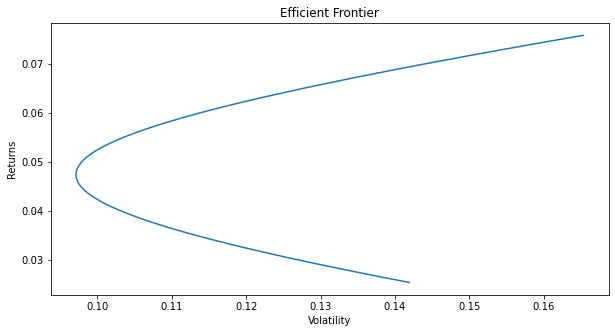

In [29]:
# We can use linspace to make the weights vary from 0 to 1:
w = np.linspace(0,1,100)
# Let's create an empty dataframe to append our calculations:
Port_Rets = []
Stdev = []
# for loop:
for W in w:
    # Returns
    Weight = [W, 1-W]
    Rets = Er*Weight
    Rets = Rets.sum()
    Port_Rets.append(Rets)
    # Standard Deviation
    Weight = np.array(Weight)
    Std = np.sqrt((np.dot(Weight, np.dot(cov,Weight.T))))*np.sqrt(12)
    Stdev.append(Std)

plt.plot(Stdev, Port_Rets)
plt.title('Efficient Frontier')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

How do we find the mean-variance portfolio?

We could simply use the formula:

<br>
\begin{align}
w_{a} & = \frac{\sigma_{b}^{2} - \rho_{a,b} \sigma_{a}\sigma_{b}}{\sigma_{a}^{2} + \sigma_{b}^{2} - 2 \rho_{a,b} \sigma_{a}\sigma_{b}}\\
w_{b} & = 1 - w_{a}\\
\end{align}
<br>
<br>
Alternatively, we could use a function to solve for this. Our goal is to minimize the standard deviation of the portfolio.

Sum of Weight: 100.0%


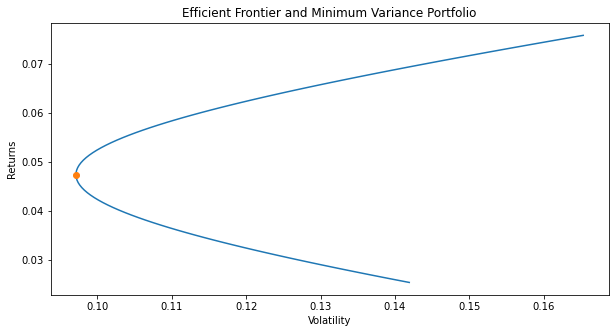

Expected Return: 0.047%
Expected Volatility: 0.097%
SPY Weight: 43.523%
TLT Weight: 56.477%


In [30]:
# Let's start with a function that gets our standard deviation
def minVol(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    return Stdev_opt

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the minimum variance portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
Var1 = minimize(minVol, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
W = Var1['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W),2)*100}%")
# Our returns would them be equal to:
Ret_opt = np.sum(Er * W)
# And the standard deviation equal to:
Std_opt = np.sqrt(np.dot(W, np.dot(cov, W.T))) * np.sqrt(12)

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o")
plt.title('Efficient Frontier and Minimum Variance Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()
print(f"Expected Return: {round(Ret_opt,3)}%")
print(f"Expected Volatility: {round(Std_opt,3)}%")
print(f"SPY Weight: {round(W[0]*100,3)}%")
print(f"TLT Weight: {round(W[1]*100,3)}%")

- Thus, our minimum variance portfolio has a 56.60% weight in TLT and a 43.40% weight in SPY.

Let's now find the optimal portfolio. Let's set our objective to be a point where we maximize sharpe. 

Sharpe being:
<br>
<br>
\begin{align}
Sharpe = \frac{\mathbb{E}(r) - r_{f}}{\sigma_{p}}
\end{align}
<br>
<br>
Consider the U.S. Treasury Securities at 1-Yr Constant Maturity as the risk-free rate.

In [31]:
# U.S. Treasury Securities at 1-Yr Constant Maturity
Rates = 'DGS1' #FRED
# Download data using pandas DataReader ('fred' for FRED data)
Rates = web.DataReader(Rates, 'fred', start, end)
Rates = Rates.dropna()
# .values[-1] will return the last value for the set
Rates = Rates['DGS1'].values[-1]/100 # as %
r = Rates
print(f'Rates: {round(r*100,4)}%')

Rates: 4.75%


Sum of Weight: 100.0%


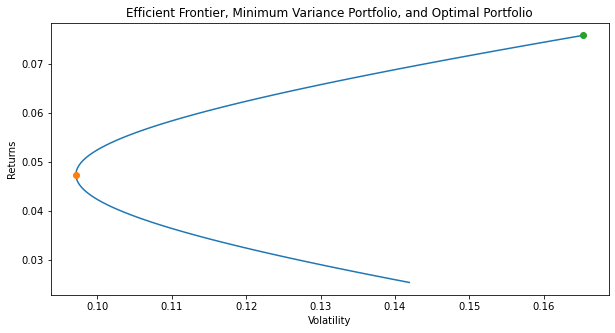

Expected Return: 7.582%
Expected Volatility: 16.534%
SPY Weight: 100.0%
TLT Weight: 0.0%


In [32]:
def maxSharpe(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    Rets = np.sum(Er * W_opt)
    Sharpe = (Rets - r)/Stdev_opt
    # To maximize sharpe, we are using a "minimize" goal, so
    # we need to minimize the "-sharpe"
    max_sharpe = Sharpe*(-1)
    return max_sharpe

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the optimal portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
M_Sharpe = minimize(maxSharpe, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
S = M_Sharpe['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W),2)*100}%")
# Our returns would them be equal to:
Ret_s = np.sum(Er * S)
# And the standard deviation equal to:
Std_s = np.sqrt(np.dot(S, np.dot(cov, S.T))) * np.sqrt(12)

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o")
plt.title('Efficient Frontier, Minimum Variance Portfolio, and Optimal Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()
print(f"Expected Return: {round(Ret_s*100,3)}%")
print(f"Expected Volatility: {round(Std_s*100,3)}%")
print(f"SPY Weight: {round(S[0]*100,3)}%")
print(f"TLT Weight: {round(S[1]*100,3)}%")

- Thus, the tangent portfolio is 100% weighted in SPY, the "market portfolio".

To find the Capital Allocation Line (CAL), we consider the y-intercept to be the risk-free rate ($r_{f}$), and the slope to be the sharpe ratio. Therefore, the CAL is:
<br>
<br>
\begin{align}
CAL = r_{f} + \frac{\mathbb{E}(r_{m}) - r_{f}}{\sigma_{m}}\sigma_{p}
\end{align}
<br>


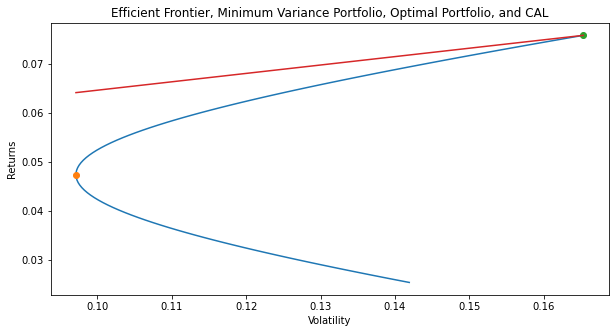

In [33]:
# Consider the max and min values for the standard deviation to be:
max_std = max(Stdev)
min_std = min(Stdev)
std_range = np.linspace(min_std, max_std, 100)

for stdev in std_range:
    Cal = r + ((Ret_s-r)/Std_s)*std_range

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o", std_range, Cal)
plt.title('Efficient Frontier, Minimum Variance Portfolio, Optimal Portfolio, and CAL')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

Let's now look at how could we use this to plot more than two assets.
<hr>
<h3> Multi Asset Portfolio </h3>
<br>
Please consider the following portfolio:
<br>
● <i>The Boeing Company (BA)</i>
<br>
● <i>Bank of America Corporation (BAC)</i>
<br>
● <i>Apple Inc. (AAPL)</i>
<br>
● <i>CVS Health Corporation (CVS)</i>
<br>
● <i>Johnson & Johnson (JNJ)</i>
<br>

In [34]:
Tickers = ['BA', 'BAC', 'AAPL', 'CVS', 'JNJ']
# Download data from Yahoo! (Adj Close to account for dividends and other corporate actions)
df = yf.download(Tickers, interval=interval, start=start)['Adj Close']
# Data into pandas dataframe
df = pd.DataFrame(df)
# Drop NaN (for non trading days)
df = df.dropna()
# Create a new DataFrame to calculate returns in continuous time
df1 = np.log(df) - np.log(df.shift(1))
# Drop first row (NaN)
df1 = df1[1::]

[*********************100%***********************]  5 of 5 completed


We can go ahead to our expected returns and covariance:

In [35]:
# 1. Expected returns
Er = ((np.prod(1+df1))**(12/((df1.count()))))-1
# Covariance Matrix
cov = df1.cov()
print(round(Er,3))
cov

AAPL    0.173
BA     -0.006
BAC    -0.119
CVS     0.057
JNJ     0.085
dtype: float64


,AAPL,BA,BAC,CVS,JNJ
AAPL,0.008228,0.003095,0.003130,0.001552,0.001300
BA,0.003095,0.010799,0.006433,0.002374,0.001440
BAC,0.003130,0.006433,0.018450,0.002893,0.002432
CVS,0.001552,0.002374,0.002893,0.004352,0.001018
JNJ,0.001300,0.001440,0.002432,0.001018,0.002033


This should return the minimum variance portfolio:

In [36]:
# Let's start with a function that gets our standard deviation
def minVol(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    return Stdev_opt

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the minimum variance portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
Var1 = minimize(minVol, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
W = Var1['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W)*100,2)}%")
# Our returns would them be equal to:
Ret_opt = np.sum(Er * W)
# And the standard deviation equal to:
Std_opt = np.sqrt(np.dot(W, np.dot(cov, W.T))) * np.sqrt(12)

print(f"Expected Return: {round(Ret_opt*100,3)}%")
print(f"Expected Volatility: {round(Std_opt*100,3)}%")

# Let's create a dataframe for our weights:
N = df1.columns
Weights = [W, N]
Weights = pd.DataFrame(Weights).T
Weights.columns = ['Weight', 'Security']
Weights

Sum of Weight: 100.0%
Expected Return: 8.413%
Expected Volatility: 14.574%


,Weight,Security
0,0.058994,AAPL
1,0.003428,BA
2,0.0,BAC
3,0.214369,CVS
4,0.72321,JNJ


Our tangent portfolio is:

In [37]:
def maxSharpe(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    Rets = np.sum(Er * W_opt)
    Sharpe = (Rets - r)/Stdev_opt
    # To maximize sharpe, we are using a "minimize" goal, so
    # we need to minimize the "-sharpe"
    max_sharpe = Sharpe*(-1)
    return max_sharpe

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that an equally weighted portfolio returns the optimal portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
M_Sharpe = minimize(maxSharpe, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
S = M_Sharpe['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W)*100,2)}%")
# Our returns would them be equal to:
Ret_s = np.sum(Er * S)
# And the standard deviation equal to:
Std_s = np.sqrt(np.dot(S, np.dot(cov, S.T))) * np.sqrt(12)

print(f"Expected Return: {round(Ret_s*100,3)}%")
print(f"Expected Volatility: {round(Std_s*100,3)}%")

# Let's create a dataframe for our weights:
N = df1.columns
Weights = [S, N]
Weights = pd.DataFrame(Weights).T
Weights.columns = ['Weight', 'Security']
Weights

Sum of Weight: 100.0%
Expected Return: 13.628%
Expected Volatility: 21.241%


,Weight,Security
0,0.579953,AAPL
1,0.0,BA
2,0.0,BAC
3,0.0,CVS
4,0.420047,JNJ


Plotting the Efficient Frontier:

In [38]:
# Let the max and min returns equal to:
max_ret1 = Er.max()
min_ret1 = Er.min()

# Returns num evenly spaced samples, calculated over the interval (3,000)
# you may want to reduce the number of steps to make this quicker
returns = np.linspace(min_ret1, max_ret1,3000)
# this empty dataframe will collect the output
vol_opt = []
# This function calculates the standard deviation just like the ones previously used.
# You may use the already created function in this step
def Stdev(Weights):
    W = np.array(Weights)
    Stdev_opt1 = np.sqrt(np.dot(W, np.dot(cov, W.T)))*np.sqrt(12)
    return Stdev_opt1
# This function calculates the returns as a function of weights
def Rets(Weights):
    W = np.array(Weights)
    Ret = np.sum(Er * W)
    return Ret

for Ret in returns:
    constraints = ({'type':'eq', 'fun':SumW},
                   {'type':'eq', 'fun': lambda w0: Rets(w0) - Ret})
    opt2 = minimize(Stdev, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    # append the output here
    vol_opt.append(opt2['fun'])

Stdev = np.array(vol_opt)
Ret = np.array(returns)

The CAL:

In [39]:
max_std = max(Stdev)
min_std = min(Stdev)
std_range = np.linspace(min_std, max_std, 100)

for stdev in std_range:
    Cal = r + ((Ret_s-r)/Std_s)*std_range

Finally, the efficient frontier:

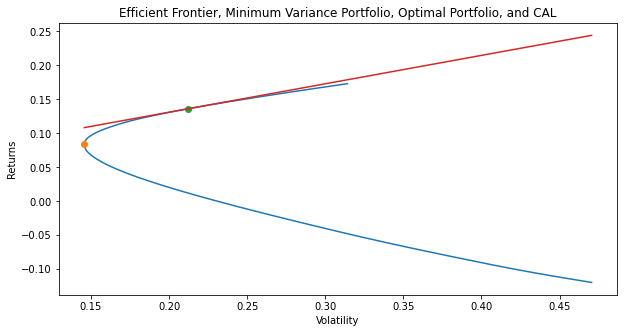

In [40]:
plt.plot(Stdev, Ret, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o", std_range, Cal)
plt.title('Efficient Frontier, Minimum Variance Portfolio, Optimal Portfolio, and CAL')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

Let's assume that we have an equally weighted portfolio. How would we perform relative to the optimal (assume maximum Sharpe, i.e., the portfolio tangent to the CAL). At this point, you may want to use a benchmark (e.g., S&P 500, Russell 2000, MSCI EAFE, etc.)
<hr>
<h3> Return Attribution</h3>
<br>
For this exercise, let's look at the 
<a href="https://morningstardirect.morningstar.com/clientcomm/Morningstar-Total-Portfolio-Performance-Attribution-Methodology.pdf">Morningstar® Total Portfolio Performance Attribution Methodology.</a> The analysis is based on the Brinson–Hood–Beebower (BHB) Model.
<br>

$$
\begin{aligned}
& \text { Table 1.1. Total Portfolio Performance Attribution }\\
&\begin{array}{cc}
\hline
\hline \text{ Tactical Asset Allocation } & \sum (w_{j}^P - w_{j}^B ) \cdot R_{j}^B \\
\text{ Stock Selection } & \sum w_{j}^B \cdot (R_{j}^P - R_{j}^B) \\
\text{ Interation }  & \sum (w_{j}^P - w_{j}^B ) \cdot (R_{j}^P - R_{j}^B) \\ \hline
\text{ Total Value Added }  & \sum (w_{j}^P \cdot R_{j}^P ) - (w_{j}^B \cdot R_{j}^B) \\
\hline
\end{array}
\end{aligned}
$$
<br>
<br>
$$
\begin{aligned}
& \text { Where }\\
&\begin{array}{cc}
\hline w_{j}^P & \text { The portfolio's weighting for group }j \\
w_{j}^B &  \text { The benchmark's weighting for group }j \\
R_{j}^P  &  \text { The portfolio's return for group }j \\
R_{j}^B  &  \text { The benchmark's return for group }j \\
\hline
\end{array}
\end{aligned}
$$
<br>
<br>
Consider the return attribution for our last month:

In [41]:
# The optimal portfolio weights:
Opt_Weight = Weights['Weight']
Sector = Weights['Security']
# An equally weighted portfolio:
Equal_Weight = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# We could construct the following dataframe for our return attribution (RA):
RA = [Sector, Equal_Weight, Opt_Weight]
RA = pd.DataFrame(RA).T
RA.columns = ['Security/Sector', 'Portfolio Weight', 'Benchmark Weight']
# Last month's returns:
# We can use the same returns since our "benchmark" holds the same securities.
RA['Returns'] = df1[-2:-1:].values.T
# Tactical Asset Allocation:
RA['Tactical Allocation'] = (RA['Portfolio Weight'] - RA['Benchmark Weight']) * RA['Returns']
# Tactical Asset Allocation:
RA['Stock Selection'] = RA['Benchmark Weight'] * (RA['Returns'] - RA['Returns'])
# Tactical Asset Allocation:
RA['Interaction'] = (RA['Portfolio Weight'] - RA['Benchmark Weight']) * (RA['Returns'] - RA['Returns'])
# Tactical Asset Allocation:
RA['Total Value Added'] = (RA['Portfolio Weight'] * RA['Returns']) - (RA['Benchmark Weight']*RA['Returns'])
# Portfolio Return:
Port_Ret = np.sum(RA['Portfolio Weight']*RA['Returns'])
# Benchmark Return:
BMR = np.sum(RA['Benchmark Weight']*RA['Returns'])
# Overview:
RA.loc[len(RA.index)] = ['Portfolio', np.sum(RA['Portfolio Weight']), np.sum(RA['Benchmark Weight']),
                         Port_Ret ,np.sum(RA['Tactical Allocation']), np.sum(RA['Stock Selection']),
                         np.sum(RA['Interaction']), np.sum(RA['Total Value Added'])]

print(f"Portfolio Return: {round(Port_Ret*100,2)}%")
print(f"Benchmark Return: {round(BMR*100,2)}%")
print(f"Outperformance: {round(((Port_Ret - BMR)*100),2)}%")

RA

Portfolio Return: 6.53%
Benchmark Return: -1.23%
Outperformance: 7.76%


,Security/Sector,Portfolio Weight,Benchmark Weight,Returns,Tactical Allocation,Stock Selection,Interaction,Total Value Added
0,AAPL,0.2,0.579953,-0.034702,0.013185,0.0,-0.0,0.013185
1,BA,0.2,0.0,0.224392,0.044878,0.0,0.0,0.044878
2,BAC,0.2,0.0,0.045031,0.009006,0.0,0.0,0.009006
3,CVS,0.2,0.0,0.072996,0.014599,0.0,0.0,0.014599
4,JNJ,0.2,0.420047,0.018622,-0.004098,0.0,-0.0,-0.004098
5,Portfolio,1.0,1.0,0.065268,0.077571,0.0,0.0,0.077571


Here we can see that our equally weighted portfolio performs better than the benchmark (the "optimal portfolio"). Since both the portfolio and benchmark hold the same stocks, the stock selection is zero (and so is the interection term). Apple underperformed as seen by negative returns. Since the benchmark holds more of that stock, their returns are lower. The other stocks (BA, BAC, and CVS) had a positive return during the month of November. The benchmark does not hold any of those stocks - thus, our equally weighted portfolio had a better performance by holding those stocks. Finally, JNJ had positive returns. Since the benchmark holds more of JNJ than our equally weighted portfolio, the benchmark outperformed due to this overweight relative to our portfolio. We can see that we had a 6.53% return in November, while the benchmark returned -1.23%. We outperformed the benchmark by 7.76% - all the outperformance came from our asset allocation.

We could plot this using a waterfall chart:

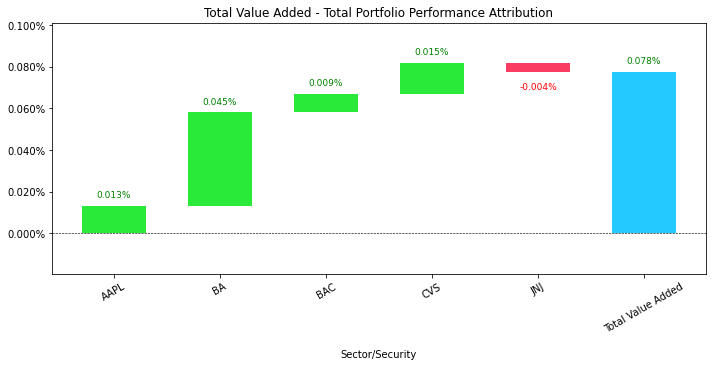

In [42]:
# Here we are just plotting the total value added, but you could use subplots to plot all four.
x1,y1=(RA['Security/Sector'][:-1:]).values,(RA['Total Value Added'][:-1:]).values
# Import package waterfall_charts as waterfall 
plot = waterfall.plot(x1, y1, net_label='Total Value Added', 
                      x_lab = 'Sector/Security',formatting ='{:.3f}%')
plot.title('Total Value Added - Total Portfolio Performance Attribution')
plot.show()

________________________________________________________________________________________________________________________
###### Leonardo F. de Souza
###### 2022